<a href="https://colab.research.google.com/github/HyeJeongIm/BP_Project/blob/main/_BP_hv3_7(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# batch_size

In [ ]:
import h5py
# from vis.visualization import visualize_cam, overlay
from tensorflow.keras import activations
#from vis.utils import utils
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import sys
import tensorflow.compat.v1 as tf
import tensorflow.keras as keras
# from tensorflow.python.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta, Nadam
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
import numpy as np
from scipy import io
from sklearn.model_selection import train_test_split

from keras.utils import np_utils
np.random.seed(7)

print('Python version : ', sys.version)
print('TensorFlow version : ', tf.__version__)
print('Keras version : ', keras.__version__)

Python version :  3.7.0 (default, Jun 28 2018, 08:04:48) [MSC v.1912 64 bit (AMD64)]
TensorFlow version :  2.3.0
Keras version :  2.4.0


In [ ]:
import numpy as np
from scipy import io

# 데이터 파일 불러오기
# train_data = io.loadmat('C:/Users/LEE/Desktop/imhzz/train_shuffled_raw_v1.mat')
# test_data = io.loadmat('C:/Users/LEE/Desktop/imhzz/test_not_shuffled_raw_v1.mat')

train_data = io.loadmat('C:/Users/LEE/Desktop/imhzz/new/train_shuffled_raw_v3.mat')
test_data = io.loadmat('C:/Users/LEE/Desktop/imhzz/new/test_not_shuffled_raw_v3.mat')

X_train = train_data['data_shuffled']
X_test = test_data['data_not_shuffled']

sbp_train = train_data['sbp_total']
sbp_test = test_data['sbp_total']
dbp_train = train_data['dbp_total']
dbp_test = test_data['dbp_total']


In [ ]:
print(X_train.shape)
print(X_test.shape) 

print(sbp_train.shape)
print(sbp_test.shape)
print(dbp_train.shape)
print(dbp_test.shape)

(168743, 127)
(43293, 127)
(168743, 1)
(43293, 1)
(168743, 1)
(43293, 1)


In [ ]:
import pandas as pd

df_train_raw = pd.DataFrame(X_train)
df_train_raw.head(103)

,0,1,2,3,4,5,6,7,8,9,...,117,118,119,120,121,122,123,124,125,126
0,0.397525,0.576176,0.782368,0.343816,0.0,0.325039,0.166250,0.58625,0.141250,0.130000,...,0.21750,0.193750,0.172500,0.151250,0.131250,0.111250,0.08875,0.061250,0.577695,0.334739
1,0.403687,0.576176,0.782368,0.343816,0.0,0.309897,0.166250,0.57500,0.140000,0.129375,...,0.21625,0.195000,0.173750,0.152500,0.132500,0.112500,0.08875,0.062500,0.588482,0.335669
2,0.405556,0.576176,0.782368,0.343816,0.0,0.317237,0.163750,0.57500,0.138125,0.127500,...,0.22375,0.201250,0.180000,0.158750,0.137500,0.115000,0.09250,0.063750,0.694625,0.386111
3,0.396543,0.576176,0.782368,0.343816,0.0,0.315348,0.168750,0.58875,0.140000,0.130000,...,0.22500,0.203125,0.180625,0.158125,0.136875,0.115625,0.09250,0.063125,0.701718,0.390863
4,0.391071,0.576176,0.782368,0.343816,0.0,0.320688,0.170625,0.59125,0.143750,0.131875,...,0.23000,0.207500,0.183750,0.161250,0.138750,0.116250,0.09250,0.063750,0.700430,0.381499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.264083,0.505748,0.826316,0.416961,0.0,0.491736,0.273750,0.84875,0.238750,0.215000,...,0.49875,0.351250,0.305000,0.259375,0.200625,0.148125,0.11000,0.073125,0.668204,0.339492
99,0.265455,0.505748,0.826316,0.416961,0.0,0.497504,0.325000,0.78750,0.275000,0.255000,...,0.31875,0.292500,0.265000,0.236250,0.202500,0.166250,0.12875,0.086250,0.535449,0.290942
100,0.258081,0.505748,0.826316,0.416961,0.0,0.498717,0.287500,0.80250,0.255000,0.230000,...,0.31500,0.287500,0.260625,0.230625,0.198750,0.163125,0.12625,0.084375,0.531307,0.294047
101,0.261381,0.505748,0.826316,0.416961,0.0,0.490427,0.335000,0.77625,0.291250,0.255000,...,0.30625,0.280000,0.252500,0.223750,0.192500,0.158750,0.12375,0.085000,0.550623,0.297881


In [ ]:
df_test_raw = pd.DataFrame(X_test)
df_test_raw.head(103)

,0,1,2,3,4,5,6,7,8,9,...,117,118,119,120,121,122,123,124,125,126
0,0.409346,0.196754,0.843158,0.327208,0.0,0.334396,0.165625,0.568750,0.136875,0.126875,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
1,0.412235,0.196754,0.843158,0.327208,0.0,0.312476,0.165625,0.562500,0.137500,0.125625,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
2,0.407614,0.196754,0.843158,0.327208,0.0,0.326504,0.167500,0.568750,0.140000,0.128750,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
3,0.407614,0.196754,0.843158,0.327208,0.0,0.356952,0.160000,0.577500,0.135000,0.123750,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
4,0.401500,0.196754,0.843158,0.327208,0.0,0.341285,0.161250,0.582500,0.136250,0.126250,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.352657,0.521650,0.867368,0.406007,0.0,0.389110,0.208750,0.641250,0.174375,0.162500,...,0.285000,0.26000,0.23125,0.20500,0.1775,0.14625,0.11125,0.07500,0.675251,0.329698
99,0.354369,0.521650,0.867368,0.406007,0.0,0.376453,0.203750,0.631250,0.170000,0.157500,...,0.285000,0.26000,0.23125,0.20500,0.1775,0.14625,0.11125,0.07500,0.675251,0.329698
100,0.349282,0.521650,0.867368,0.406007,0.0,0.384221,0.214375,0.641875,0.181250,0.166250,...,0.285000,0.26000,0.23125,0.20500,0.1775,0.14625,0.11125,0.07500,0.675251,0.329698
101,0.350962,0.521650,0.867368,0.406007,0.0,0.384311,0.205625,0.646250,0.171250,0.158125,...,0.285000,0.26000,0.23125,0.20500,0.1775,0.14625,0.11125,0.07500,0.675251,0.329698


In [ ]:
total_me = 0
total_std = 0

In [ ]:
#parameter
batch_size = 1024
epochs = 500
lrate = 0.001

# SBP

## 1

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(16, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(1))
    
    
    return model

model = model1()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                2048      
_________________________________________________________________
batch_normalization (BatchNo (None, 16)                64        
_________________________________________________________________
activation (Activation)      (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
batch_normalization_1 (Batch (None, 16)                64        
_________________________________________________________________
activation_1 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1

In [ ]:
# model = model1()
# model.summary()

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
history = model.fit(X_train, sbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, sbp_test))


Epoch 1/500
165/165 [==============================] - 0s 3ms/step - loss: 12392.1729 - val_loss: 12240.1309
Epoch 2/500
165/165 [==============================] - 2s 10ms/step - loss: 11865.0195 - val_loss: 11415.2324
Epoch 3/500
165/165 [==============================] - 0s 2ms/step - loss: 11180.9395 - val_loss: 10818.8818
Epoch 4/500
165/165 [==============================] - 0s 2ms/step - loss: 10265.9033 - val_loss: 9439.0283
Epoch 5/500
165/165 [==============================] - 2s 10ms/step - loss: 9160.0430 - val_loss: 8714.8936
Epoch 6/500
165/165 [==============================] - 0s 3ms/step - loss: 7917.0479 - val_loss: 6999.2500
Epoch 7/500
165/165 [==============================] - 0s 3ms/step - loss: 6590.9155 - val_loss: 6374.0957
Epoch 8/500
165/165 [==============================] - 6s 38ms/step - loss: 5248.2075 - val_loss: 5067.8960
Epoch 9/500
165/165 [==============================] - 1s 7ms/step - loss: 3950.6633 - val_loss: 3229.0586
Epoch 10/500
165/165 [=====

165/165 [==============================] - 0s 2ms/step - loss: 82.3646 - val_loss: 154.2250
Epoch 79/500
165/165 [==============================] - 0s 2ms/step - loss: 82.6016 - val_loss: 102.7957
Epoch 80/500
165/165 [==============================] - 2s 10ms/step - loss: 82.2197 - val_loss: 106.9617
Epoch 81/500
165/165 [==============================] - 0s 2ms/step - loss: 82.1598 - val_loss: 107.0664
Epoch 82/500
165/165 [==============================] - 0s 2ms/step - loss: 81.9575 - val_loss: 141.5059
Epoch 83/500
165/165 [==============================] - 2s 10ms/step - loss: 81.7141 - val_loss: 98.6394
Epoch 84/500
165/165 [==============================] - 0s 2ms/step - loss: 81.7318 - val_loss: 97.2616
Epoch 85/500
165/165 [==============================] - 2s 10ms/step - loss: 81.2706 - val_loss: 105.1702
Epoch 86/500
165/165 [==============================] - 0s 2ms/step - loss: 81.8579 - val_loss: 107.9262
Epoch 87/500
165/165 [==============================] - 0s 2ms/step

165/165 [==============================] - 2s 10ms/step - loss: 75.9337 - val_loss: 98.0772
Epoch 156/500
165/165 [==============================] - 0s 3ms/step - loss: 75.6855 - val_loss: 100.4197
Epoch 157/500
165/165 [==============================] - 2s 10ms/step - loss: 75.9266 - val_loss: 130.9657
Epoch 158/500
165/165 [==============================] - 0s 2ms/step - loss: 75.8726 - val_loss: 92.0954
Epoch 159/500
165/165 [==============================] - 0s 2ms/step - loss: 75.6620 - val_loss: 106.8830
Epoch 160/500
165/165 [==============================] - 2s 10ms/step - loss: 75.7959 - val_loss: 111.2219
Epoch 161/500
165/165 [==============================] - 0s 2ms/step - loss: 75.8203 - val_loss: 133.8430
Epoch 162/500
165/165 [==============================] - 2s 10ms/step - loss: 75.7294 - val_loss: 115.1374
Epoch 163/500
165/165 [==============================] - 0s 2ms/step - loss: 75.6481 - val_loss: 122.3703
Epoch 164/500
165/165 [==============================] - 0

165/165 [==============================] - 2s 10ms/step - loss: 73.7760 - val_loss: 107.3647
Epoch 233/500
165/165 [==============================] - 0s 3ms/step - loss: 73.5939 - val_loss: 96.6009
Epoch 234/500
165/165 [==============================] - 0s 2ms/step - loss: 73.6774 - val_loss: 88.6931
Epoch 235/500
165/165 [==============================] - 2s 10ms/step - loss: 73.7605 - val_loss: 132.0009
Epoch 236/500
165/165 [==============================] - 0s 2ms/step - loss: 73.6271 - val_loss: 92.4334
Epoch 237/500
165/165 [==============================] - 2s 10ms/step - loss: 73.5896 - val_loss: 89.8370
Epoch 238/500
165/165 [==============================] - 0s 2ms/step - loss: 73.7653 - val_loss: 130.7034
Epoch 239/500
165/165 [==============================] - 0s 2ms/step - loss: 73.8322 - val_loss: 104.9475
Epoch 240/500
165/165 [==============================] - 2s 10ms/step - loss: 73.3999 - val_loss: 130.0593
Epoch 241/500
165/165 [==============================] - 0s 

165/165 [==============================] - 0s 2ms/step - loss: 72.6835 - val_loss: 115.9949
Epoch 310/500
165/165 [==============================] - 0s 2ms/step - loss: 72.6009 - val_loss: 115.2555
Epoch 311/500
165/165 [==============================] - 2s 10ms/step - loss: 72.7222 - val_loss: 103.8269
Epoch 312/500
165/165 [==============================] - 0s 2ms/step - loss: 72.5783 - val_loss: 109.2211
Epoch 313/500
165/165 [==============================] - 2s 10ms/step - loss: 72.6450 - val_loss: 94.9351
Epoch 314/500
165/165 [==============================] - 0s 2ms/step - loss: 72.6499 - val_loss: 92.8545
Epoch 315/500
165/165 [==============================] - 0s 2ms/step - loss: 72.7780 - val_loss: 113.1827
Epoch 316/500
165/165 [==============================] - 2s 10ms/step - loss: 72.6909 - val_loss: 85.8156
Epoch 317/500
165/165 [==============================] - 0s 2ms/step - loss: 72.6319 - val_loss: 103.3676
Epoch 318/500
165/165 [==============================] - 2s 

165/165 [==============================] - 2s 10ms/step - loss: 72.0831 - val_loss: 94.9086
Epoch 387/500
165/165 [==============================] - 0s 2ms/step - loss: 71.9825 - val_loss: 97.9754
Epoch 388/500
165/165 [==============================] - 0s 2ms/step - loss: 71.8382 - val_loss: 90.7930
Epoch 389/500
165/165 [==============================] - 2s 10ms/step - loss: 71.9482 - val_loss: 96.6837
Epoch 390/500
165/165 [==============================] - 0s 2ms/step - loss: 71.9903 - val_loss: 91.8785
Epoch 391/500
165/165 [==============================] - 2s 10ms/step - loss: 72.0007 - val_loss: 92.5785
Epoch 392/500
165/165 [==============================] - 0s 2ms/step - loss: 71.9108 - val_loss: 104.4090
Epoch 393/500
165/165 [==============================] - 0s 2ms/step - loss: 72.1116 - val_loss: 124.2414
Epoch 394/500
165/165 [==============================] - 2s 10ms/step - loss: 72.0035 - val_loss: 111.0081
Epoch 395/500
165/165 [==============================] - 0s 2m

165/165 [==============================] - 0s 2ms/step - loss: 71.6062 - val_loss: 93.2980
Epoch 464/500
165/165 [==============================] - 0s 2ms/step - loss: 71.4652 - val_loss: 99.0870
Epoch 465/500
165/165 [==============================] - 2s 10ms/step - loss: 71.6324 - val_loss: 92.8780
Epoch 466/500
165/165 [==============================] - 0s 2ms/step - loss: 71.5276 - val_loss: 89.1454
Epoch 467/500
165/165 [==============================] - 2s 10ms/step - loss: 71.3723 - val_loss: 93.1937
Epoch 468/500
165/165 [==============================] - 0s 3ms/step - loss: 71.4234 - val_loss: 104.6755
Epoch 469/500
165/165 [==============================] - 2s 10ms/step - loss: 71.5109 - val_loss: 95.3548
Epoch 470/500
165/165 [==============================] - 0s 2ms/step - loss: 71.4576 - val_loss: 170.5690
Epoch 471/500
165/165 [==============================] - 0s 2ms/step - loss: 71.1898 - val_loss: 93.5226
Epoch 472/500
165/165 [==============================] - 2s 10ms

In [ ]:
pred = model.predict(X_test)
err = sbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

# 오차의 평균 낮으면 좋은거야 , std 오차들의 표준편차 작으면 좋은거야 
# 앙상블 , 
total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  -1.9911961977427606 
MAE:  7.373488518977635 
SD:  9.591194913038715


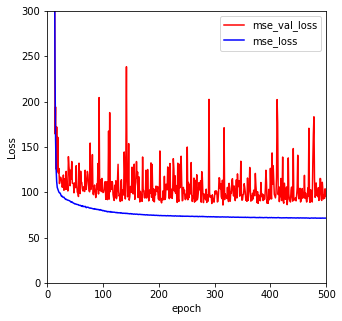

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(history.history['val_loss'],color='red')
   
plt.plot(history.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

## 2

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(16, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(1))
    
    
    return model

In [ ]:
model = model1()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                2048      
_________________________________________________________________
batch_normalization_2 (Batch (None, 16)                64        
_________________________________________________________________
activation_2 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
batch_normalization_3 (Batch (None, 16)                64        
_________________________________________________________________
activation_3 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
history = model.fit(X_train, sbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, sbp_test))


Epoch 1/500
165/165 [==============================] - 1s 3ms/step - loss: 12276.5010 - val_loss: 12194.0078
Epoch 2/500
165/165 [==============================] - 2s 10ms/step - loss: 11691.5811 - val_loss: 11373.1299
Epoch 3/500
165/165 [==============================] - 0s 2ms/step - loss: 10972.1836 - val_loss: 10243.8682
Epoch 4/500
165/165 [==============================] - 2s 10ms/step - loss: 10007.1787 - val_loss: 8934.2158
Epoch 5/500
165/165 [==============================] - 0s 2ms/step - loss: 8870.5986 - val_loss: 7758.8008
Epoch 6/500
165/165 [==============================] - 0s 2ms/step - loss: 7575.8687 - val_loss: 7732.3022
Epoch 7/500
165/165 [==============================] - 2s 10ms/step - loss: 6007.7456 - val_loss: 6388.5752
Epoch 8/500
165/165 [==============================] - 0s 2ms/step - loss: 4371.7725 - val_loss: 4465.2373
Epoch 9/500
165/165 [==============================] - 2s 10ms/step - loss: 3041.9482 - val_loss: 4358.1675
Epoch 10/500
165/165 [====

165/165 [==============================] - ETA: 0s - loss: 89.04 - 0s 2ms/step - loss: 88.8097 - val_loss: 104.8531
Epoch 79/500
165/165 [==============================] - 0s 2ms/step - loss: 88.3692 - val_loss: 118.5081
Epoch 80/500
165/165 [==============================] - 2s 10ms/step - loss: 88.1891 - val_loss: 117.1721
Epoch 81/500
165/165 [==============================] - 0s 2ms/step - loss: 87.7609 - val_loss: 126.6014
Epoch 82/500
165/165 [==============================] - 0s 2ms/step - loss: 87.8341 - val_loss: 100.9010
Epoch 83/500
165/165 [==============================] - 2s 10ms/step - loss: 87.1506 - val_loss: 108.1230
Epoch 84/500
165/165 [==============================] - 0s 2ms/step - loss: 87.4499 - val_loss: 115.1110
Epoch 85/500
165/165 [==============================] - 2s 10ms/step - loss: 87.2578 - val_loss: 123.2181
Epoch 86/500
165/165 [==============================] - 0s 2ms/step - loss: 86.8045 - val_loss: 110.1174
Epoch 87/500
165/165 [===================

165/165 [==============================] - 2s 10ms/step - loss: 78.5502 - val_loss: 98.4823
Epoch 156/500
165/165 [==============================] - 0s 2ms/step - loss: 78.4384 - val_loss: 92.8200
Epoch 157/500
165/165 [==============================] - 0s 2ms/step - loss: 78.4399 - val_loss: 96.8524
Epoch 158/500
165/165 [==============================] - 2s 10ms/step - loss: 78.4816 - val_loss: 115.4764
Epoch 159/500
165/165 [==============================] - 0s 2ms/step - loss: 78.2403 - val_loss: 93.1434
Epoch 160/500
165/165 [==============================] - 2s 10ms/step - loss: 78.3804 - val_loss: 94.9505
Epoch 161/500
165/165 [==============================] - 0s 2ms/step - loss: 78.1315 - val_loss: 105.7039
Epoch 162/500
165/165 [==============================] - 2s 10ms/step - loss: 78.3879 - val_loss: 95.2566
Epoch 163/500
165/165 [==============================] - 0s 3ms/step - loss: 78.0591 - val_loss: 100.5667
Epoch 164/500
165/165 [==============================] - 0s 2m

165/165 [==============================] - 2s 10ms/step - loss: 76.1132 - val_loss: 166.1846
Epoch 233/500
165/165 [==============================] - 0s 2ms/step - loss: 75.9742 - val_loss: 94.7477
Epoch 234/500
165/165 [==============================] - 0s 2ms/step - loss: 76.2743 - val_loss: 94.8386
Epoch 235/500
165/165 [==============================] - 2s 10ms/step - loss: 75.7933 - val_loss: 89.9870
Epoch 236/500
165/165 [==============================] - 0s 2ms/step - loss: 75.8448 - val_loss: 95.0063
Epoch 237/500
165/165 [==============================] - 0s 2ms/step - loss: 75.7913 - val_loss: 100.8052
Epoch 238/500
165/165 [==============================] - 2s 10ms/step - loss: 75.8457 - val_loss: 100.4700
Epoch 239/500
165/165 [==============================] - 0s 2ms/step - loss: 75.8798 - val_loss: 89.6167
Epoch 240/500
165/165 [==============================] - 0s 2ms/step - loss: 76.1078 - val_loss: 111.5428
Epoch 241/500
165/165 [==============================] - 2s 10

165/165 [==============================] - 2s 10ms/step - loss: 74.5527 - val_loss: 116.6392
Epoch 310/500
165/165 [==============================] - 0s 2ms/step - loss: 74.6372 - val_loss: 106.8114
Epoch 311/500
165/165 [==============================] - 2s 10ms/step - loss: 74.5728 - val_loss: 100.3516
Epoch 312/500
165/165 [==============================] - 0s 2ms/step - loss: 74.3070 - val_loss: 103.7666
Epoch 313/500
165/165 [==============================] - 0s 2ms/step - loss: 74.4966 - val_loss: 91.2783
Epoch 314/500
165/165 [==============================] - 2s 10ms/step - loss: 74.4221 - val_loss: 109.9205
Epoch 315/500
165/165 [==============================] - 0s 2ms/step - loss: 74.3162 - val_loss: 99.8039
Epoch 316/500
165/165 [==============================] - 2s 10ms/step - loss: 74.4308 - val_loss: 114.1936
Epoch 317/500
165/165 [==============================] - 0s 2ms/step - loss: 74.2863 - val_loss: 88.8145
Epoch 318/500
165/165 [==============================] - 2s

165/165 [==============================] - 0s 2ms/step - loss: 73.8506 - val_loss: 105.7306
Epoch 387/500
165/165 [==============================] - 0s 2ms/step - loss: 73.5075 - val_loss: 106.7713
Epoch 388/500
165/165 [==============================] - 2s 10ms/step - loss: 73.5263 - val_loss: 95.0501
Epoch 389/500
165/165 [==============================] - 0s 2ms/step - loss: 73.6620 - val_loss: 97.2032
Epoch 390/500
165/165 [==============================] - 0s 2ms/step - loss: 73.6912 - val_loss: 95.5032
Epoch 391/500
165/165 [==============================] - 2s 10ms/step - loss: 73.6761 - val_loss: 94.0185
Epoch 392/500
165/165 [==============================] - 0s 2ms/step - loss: 73.5996 - val_loss: 92.7302
Epoch 393/500
165/165 [==============================] - 2s 10ms/step - loss: 73.6018 - val_loss: 92.4304
Epoch 394/500
165/165 [==============================] - 0s 2ms/step - loss: 73.5776 - val_loss: 87.8951
Epoch 395/500
165/165 [==============================] - 2s 10ms

165/165 [==============================] - 2s 10ms/step - loss: 73.2940 - val_loss: 89.5446
Epoch 464/500
165/165 [==============================] - 0s 2ms/step - loss: 73.1037 - val_loss: 90.3441
Epoch 465/500
165/165 [==============================] - 0s 2ms/step - loss: 73.1560 - val_loss: 90.4654
Epoch 466/500
165/165 [==============================] - 2s 10ms/step - loss: 73.1640 - val_loss: 93.0299
Epoch 467/500
165/165 [==============================] - 0s 3ms/step - loss: 73.0181 - val_loss: 93.2325
Epoch 468/500
165/165 [==============================] - 2s 10ms/step - loss: 73.0498 - val_loss: 108.2597
Epoch 469/500
165/165 [==============================] - 0s 3ms/step - loss: 73.1274 - val_loss: 88.1346
Epoch 470/500
165/165 [==============================] - 0s 2ms/step - loss: 73.1194 - val_loss: 93.4646
Epoch 471/500
165/165 [==============================] - 2s 10ms/step - loss: 73.1224 - val_loss: 116.6155
Epoch 472/500
165/165 [==============================] - 0s 2ms

In [ ]:
pred = model.predict(X_test)
err = sbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

# 오차의 평균 낮으면 좋은거야 , std 오차들의 표준편차 작으면 좋은거야 
# 앙상블 , 
total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  -0.19448080246294389 
MAE:  7.113953236461245 
SD:  9.566452707519256


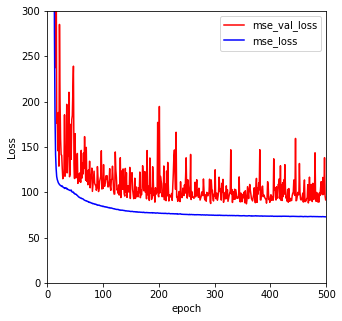

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(history.history['val_loss'],color='red')
   
plt.plot(history.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

## 3

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(16, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(1))
    
    
    return model

In [ ]:
model = model1()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                2048      
_________________________________________________________________
batch_normalization_4 (Batch (None, 16)                64        
_________________________________________________________________
activation_4 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
batch_normalization_5 (Batch (None, 16)                64        
_________________________________________________________________
activation_5 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
history = model.fit(X_train, sbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, sbp_test))


Epoch 1/500
165/165 [==============================] - 2s 11ms/step - loss: 12205.4600 - val_loss: 12129.6035
Epoch 2/500
165/165 [==============================] - 0s 3ms/step - loss: 11586.5645 - val_loss: 11554.4453
Epoch 3/500
165/165 [==============================] - 0s 2ms/step - loss: 10761.9053 - val_loss: 9947.3613
Epoch 4/500
165/165 [==============================] - 2s 10ms/step - loss: 9665.9268 - val_loss: 8346.6777
Epoch 5/500
165/165 [==============================] - 0s 2ms/step - loss: 8323.5420 - val_loss: 6629.5674
Epoch 6/500
165/165 [==============================] - 2s 10ms/step - loss: 6836.8560 - val_loss: 5766.0981
Epoch 7/500
165/165 [==============================] - 0s 3ms/step - loss: 5339.2642 - val_loss: 4621.0469
Epoch 8/500
165/165 [==============================] - 0s 3ms/step - loss: 3957.6868 - val_loss: 3402.8655
Epoch 9/500
165/165 [==============================] - 2s 10ms/step - loss: 2785.8452 - val_loss: 2535.8979
Epoch 10/500
165/165 [======

165/165 [==============================] - 2s 10ms/step - loss: 81.0210 - val_loss: 153.7087
Epoch 79/500
165/165 [==============================] - 0s 2ms/step - loss: 80.8710 - val_loss: 94.3355
Epoch 80/500
165/165 [==============================] - 2s 10ms/step - loss: 81.0846 - val_loss: 119.4199
Epoch 81/500
165/165 [==============================] - 0s 2ms/step - loss: 80.9012 - val_loss: 151.4646
Epoch 82/500
165/165 [==============================] - 0s 2ms/step - loss: 80.3343 - val_loss: 116.8923
Epoch 83/500
165/165 [==============================] - 2s 10ms/step - loss: 80.3819 - val_loss: 156.2021
Epoch 84/500
165/165 [==============================] - 0s 2ms/step - loss: 80.3628 - val_loss: 118.2321
Epoch 85/500
165/165 [==============================] - 2s 10ms/step - loss: 80.0503 - val_loss: 123.5429
Epoch 86/500
165/165 [==============================] - 0s 2ms/step - loss: 80.0584 - val_loss: 96.2402
Epoch 87/500
165/165 [==============================] - 0s 2ms/ste

165/165 [==============================] - 0s 2ms/step - loss: 76.0825 - val_loss: 95.1508
Epoch 156/500
165/165 [==============================] - 0s 2ms/step - loss: 76.3451 - val_loss: 103.5505
Epoch 157/500
165/165 [==============================] - 2s 10ms/step - loss: 76.3860 - val_loss: 98.9801
Epoch 158/500
165/165 [==============================] - 0s 2ms/step - loss: 76.0628 - val_loss: 100.3429
Epoch 159/500
165/165 [==============================] - 2s 10ms/step - loss: 76.1556 - val_loss: 90.8168
Epoch 160/500
165/165 [==============================] - 0s 2ms/step - loss: 76.2190 - val_loss: 96.1091
Epoch 161/500
165/165 [==============================] - 2s 10ms/step - loss: 76.0148 - val_loss: 108.0164
Epoch 162/500
165/165 [==============================] - 0s 2ms/step - loss: 76.1395 - val_loss: 117.9187
Epoch 163/500
165/165 [==============================] - 0s 2ms/step - loss: 76.0819 - val_loss: 106.6457
Epoch 164/500
165/165 [==============================] - 2s 1

165/165 [==============================] - 0s 2ms/step - loss: 74.7430 - val_loss: 98.3814
Epoch 233/500
165/165 [==============================] - 2s 10ms/step - loss: 74.6830 - val_loss: 94.5687
Epoch 234/500
165/165 [==============================] - 0s 3ms/step - loss: 74.4804 - val_loss: 92.3514
Epoch 235/500
165/165 [==============================] - 0s 2ms/step - loss: 74.6934 - val_loss: 101.5260
Epoch 236/500
165/165 [==============================] - 2s 10ms/step - loss: 74.7955 - val_loss: 91.2617
Epoch 237/500
165/165 [==============================] - 0s 2ms/step - loss: 74.6085 - val_loss: 96.9825
Epoch 238/500
165/165 [==============================] - 2s 10ms/step - loss: 74.5698 - val_loss: 108.6959
Epoch 239/500
165/165 [==============================] - 0s 3ms/step - loss: 74.5616 - val_loss: 152.2455
Epoch 240/500
165/165 [==============================] - 0s 2ms/step - loss: 74.5912 - val_loss: 109.4724
Epoch 241/500
165/165 [==============================] - 2s 10

165/165 [==============================] - 2s 10ms/step - loss: 73.7156 - val_loss: 118.7659
Epoch 310/500
165/165 [==============================] - 0s 2ms/step - loss: 73.6252 - val_loss: 106.4137
Epoch 311/500
165/165 [==============================] - 0s 2ms/step - loss: 73.5574 - val_loss: 106.1909
Epoch 312/500
165/165 [==============================] - 2s 10ms/step - loss: 73.5288 - val_loss: 98.0890
Epoch 313/500
165/165 [==============================] - 0s 2ms/step - loss: 73.5124 - val_loss: 101.4138
Epoch 314/500
165/165 [==============================] - 2s 10ms/step - loss: 73.5781 - val_loss: 95.2181
Epoch 315/500
165/165 [==============================] - 0s 2ms/step - loss: 73.6126 - val_loss: 94.3731
Epoch 316/500
165/165 [==============================] - 0s 2ms/step - loss: 73.4298 - val_loss: 107.3155
Epoch 317/500
165/165 [==============================] - 2s 10ms/step - loss: 73.5461 - val_loss: 106.6246
Epoch 318/500
165/165 [==============================] - 0s

165/165 [==============================] - 2s 10ms/step - loss: 73.0158 - val_loss: 101.5242
Epoch 387/500
165/165 [==============================] - 0s 2ms/step - loss: 72.9453 - val_loss: 104.3501
Epoch 388/500
165/165 [==============================] - 2s 10ms/step - loss: 73.0730 - val_loss: 91.5483
Epoch 389/500
165/165 [==============================] - 0s 2ms/step - loss: 73.0468 - val_loss: 118.8217
Epoch 390/500
165/165 [==============================] - 0s 2ms/step - loss: 73.1427 - val_loss: 104.3522
Epoch 391/500
165/165 [==============================] - 2s 10ms/step - loss: 72.9699 - val_loss: 92.1743
Epoch 392/500
165/165 [==============================] - 0s 2ms/step - loss: 72.9874 - val_loss: 103.9312
Epoch 393/500
165/165 [==============================] - 2s 10ms/step - loss: 72.9717 - val_loss: 134.9202
Epoch 394/500
165/165 [==============================] - 0s 2ms/step - loss: 73.0607 - val_loss: 95.2357
Epoch 395/500
165/165 [==============================] - 0s

165/165 [==============================] - 0s 2ms/step - loss: 72.5881 - val_loss: 109.7253
Epoch 464/500
165/165 [==============================] - 0s 2ms/step - loss: 72.7282 - val_loss: 93.6029
Epoch 465/500
165/165 [==============================] - 2s 10ms/step - loss: 72.6268 - val_loss: 104.4891
Epoch 466/500
165/165 [==============================] - 0s 3ms/step - loss: 72.5651 - val_loss: 88.9016
Epoch 467/500
165/165 [==============================] - 2s 10ms/step - loss: 72.5412 - val_loss: 91.7879
Epoch 468/500
165/165 [==============================] - 0s 2ms/step - loss: 72.6372 - val_loss: 101.0338
Epoch 469/500
165/165 [==============================] - 2s 10ms/step - loss: 72.6567 - val_loss: 119.2617
Epoch 470/500
165/165 [==============================] - 0s 2ms/step - loss: 72.6199 - val_loss: 89.4736
Epoch 471/500
165/165 [==============================] - 0s 2ms/step - loss: 72.6908 - val_loss: 97.1059
Epoch 472/500
165/165 [==============================] - 2s 10

In [ ]:
pred = model.predict(X_test)
err = sbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

# 오차의 평균 낮으면 좋은거야 , std 오차들의 표준편차 작으면 좋은거야 
# 앙상블 , 
total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  2.2460788441501975 
MAE:  7.1339241561651985 
SD:  9.32617689051801


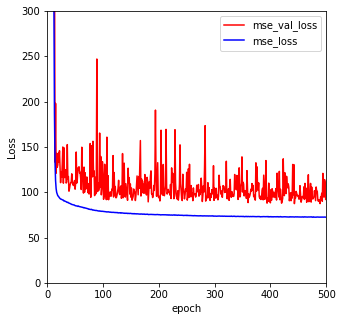

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(history.history['val_loss'],color='red')
   
plt.plot(history.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

In [ ]:
Ensemble_me = total_me/3
Ensemble_std = total_std/3

print("\nEnsemble_me: ", Ensemble_me, "\nEnsemble_std: ", Ensemble_std)


Ensemble_me:  0.020133947981497702 
Ensemble_std:  9.49460817035866


# DBP

In [ ]:
total_me = 0
total_std = 0

## 1

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(16, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(1))
    
    
    return model

In [ ]:
model = model1()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                2048      
_________________________________________________________________
batch_normalization_6 (Batch (None, 16)                64        
_________________________________________________________________
activation_6 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
batch_normalization_7 (Batch (None, 16)                64        
_________________________________________________________________
activation_7 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
hist = model.fit(X_train, dbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, dbp_test))


Epoch 1/500
165/165 [==============================] - 2s 11ms/step - loss: 3571.7700 - val_loss: 3500.0105
Epoch 2/500
165/165 [==============================] - 0s 2ms/step - loss: 3198.5488 - val_loss: 3102.7871
Epoch 3/500
165/165 [==============================] - 2s 10ms/step - loss: 2753.0173 - val_loss: 2467.3660
Epoch 4/500
165/165 [==============================] - 0s 2ms/step - loss: 2238.5845 - val_loss: 1743.7589
Epoch 5/500
165/165 [==============================] - 2s 10ms/step - loss: 1701.5342 - val_loss: 1233.4082
Epoch 6/500
165/165 [==============================] - 0s 3ms/step - loss: 1192.7629 - val_loss: 740.5782
Epoch 7/500
165/165 [==============================] - 0s 2ms/step - loss: 757.6277 - val_loss: 597.8160
Epoch 8/500
165/165 [==============================] - 2s 10ms/step - loss: 430.4448 - val_loss: 210.2993
Epoch 9/500
165/165 [==============================] - 0s 2ms/step - loss: 221.8742 - val_loss: 134.9277
Epoch 10/500
165/165 [==================

165/165 [==============================] - 0s 2ms/step - loss: 29.2797 - val_loss: 41.0449
Epoch 80/500
165/165 [==============================] - 2s 10ms/step - loss: 29.3126 - val_loss: 36.4876
Epoch 81/500
165/165 [==============================] - 0s 2ms/step - loss: 29.1773 - val_loss: 40.6301
Epoch 82/500
165/165 [==============================] - 2s 10ms/step - loss: 29.3376 - val_loss: 47.8190
Epoch 83/500
165/165 [==============================] - 0s 3ms/step - loss: 29.2109 - val_loss: 45.9221
Epoch 84/500
165/165 [==============================] - 0s 2ms/step - loss: 29.2345 - val_loss: 37.1258
Epoch 85/500
165/165 [==============================] - 2s 10ms/step - loss: 29.1830 - val_loss: 36.6141
Epoch 86/500
165/165 [==============================] - 0s 2ms/step - loss: 29.0888 - val_loss: 38.3264
Epoch 87/500
165/165 [==============================] - 2s 10ms/step - loss: 29.1059 - val_loss: 47.4555
Epoch 88/500
165/165 [==============================] - 0s 3ms/step - los

165/165 [==============================] - 2s 10ms/step - loss: 28.4031 - val_loss: 40.5977
Epoch 158/500
165/165 [==============================] - 0s 2ms/step - loss: 28.4175 - val_loss: 35.7540
Epoch 159/500
165/165 [==============================] - 2s 10ms/step - loss: 28.4597 - val_loss: 38.7329
Epoch 160/500
165/165 [==============================] - 0s 3ms/step - loss: 28.4416 - val_loss: 39.4672
Epoch 161/500
165/165 [==============================] - 2s 10ms/step - loss: 28.4445 - val_loss: 36.0810
Epoch 162/500
165/165 [==============================] - 0s 2ms/step - loss: 28.4360 - val_loss: 36.5648
Epoch 163/500
165/165 [==============================] - 0s 2ms/step - loss: 28.5181 - val_loss: 35.6912
Epoch 164/500
165/165 [==============================] - 2s 10ms/step - loss: 28.4543 - val_loss: 39.0385
Epoch 165/500
165/165 [==============================] - 0s 2ms/step - loss: 28.4556 - val_loss: 38.2967
Epoch 166/500
165/165 [==============================] - 2s 10ms/

Epoch 235/500
165/165 [==============================] - 0s 2ms/step - loss: 28.0402 - val_loss: 37.6317
Epoch 236/500
165/165 [==============================] - 2s 10ms/step - loss: 28.1100 - val_loss: 40.3726
Epoch 237/500
165/165 [==============================] - 0s 2ms/step - loss: 28.0096 - val_loss: 35.1326
Epoch 238/500
165/165 [==============================] - 2s 10ms/step - loss: 28.0778 - val_loss: 37.6446
Epoch 239/500
165/165 [==============================] - 0s 2ms/step - loss: 28.0102 - val_loss: 40.3956
Epoch 240/500
165/165 [==============================] - 0s 2ms/step - loss: 28.0797 - val_loss: 43.9942
Epoch 241/500
165/165 [==============================] - 2s 10ms/step - loss: 28.0706 - val_loss: 35.6882
Epoch 242/500
165/165 [==============================] - 0s 2ms/step - loss: 28.1381 - val_loss: 44.1855
Epoch 243/500
165/165 [==============================] - 2s 10ms/step - loss: 28.0556 - val_loss: 35.5408
Epoch 244/500
165/165 [============================

165/165 [==============================] - 0s 2ms/step - loss: 27.7607 - val_loss: 41.0212
Epoch 313/500
165/165 [==============================] - 2s 10ms/step - loss: 27.8485 - val_loss: 46.9502
Epoch 314/500
165/165 [==============================] - 0s 3ms/step - loss: 27.8989 - val_loss: 38.1540
Epoch 315/500
165/165 [==============================] - 0s 2ms/step - loss: 27.8275 - val_loss: 40.2108
Epoch 316/500
165/165 [==============================] - 2s 10ms/step - loss: 27.8021 - val_loss: 35.7999
Epoch 317/500
165/165 [==============================] - 0s 2ms/step - loss: 27.8802 - val_loss: 40.2093
Epoch 318/500
165/165 [==============================] - 2s 10ms/step - loss: 27.8306 - val_loss: 33.9763
Epoch 319/500
165/165 [==============================] - 0s 2ms/step - loss: 27.8108 - val_loss: 40.1932
Epoch 320/500
165/165 [==============================] - 0s 2ms/step - loss: 27.7963 - val_loss: 41.4746
Epoch 321/500
165/165 [==============================] - 2s 10ms/s

Epoch 390/500
165/165 [==============================] - 0s 2ms/step - loss: 27.6917 - val_loss: 33.2214
Epoch 391/500
165/165 [==============================] - 0s 2ms/step - loss: 27.7034 - val_loss: 44.1848
Epoch 392/500
165/165 [==============================] - 2s 10ms/step - loss: 27.8312 - val_loss: 34.6740
Epoch 393/500
165/165 [==============================] - 0s 2ms/step - loss: 27.7152 - val_loss: 40.6353
Epoch 394/500
165/165 [==============================] - 2s 10ms/step - loss: 27.6618 - val_loss: 38.1647
Epoch 395/500
165/165 [==============================] - 0s 2ms/step - loss: 27.6881 - val_loss: 37.4231
Epoch 396/500
165/165 [==============================] - 0s 2ms/step - loss: 27.7040 - val_loss: 37.3842
Epoch 397/500
165/165 [==============================] - 2s 10ms/step - loss: 27.7609 - val_loss: 35.2217
Epoch 398/500
165/165 [==============================] - 0s 2ms/step - loss: 27.6987 - val_loss: 35.6239
Epoch 399/500
165/165 [=============================

165/165 [==============================] - 0s 2ms/step - loss: 27.6757 - val_loss: 36.3779
Epoch 468/500
165/165 [==============================] - 0s 2ms/step - loss: 27.7029 - val_loss: 34.5045
Epoch 469/500
165/165 [==============================] - 2s 10ms/step - loss: 27.6511 - val_loss: 37.0812
Epoch 470/500
165/165 [==============================] - 0s 2ms/step - loss: 27.6560 - val_loss: 34.0656
Epoch 471/500
165/165 [==============================] - 2s 10ms/step - loss: 27.6366 - val_loss: 37.1430
Epoch 472/500
165/165 [==============================] - 0s 2ms/step - loss: 27.5398 - val_loss: 39.7835
Epoch 473/500
165/165 [==============================] - 0s 2ms/step - loss: 27.6081 - val_loss: 47.0567
Epoch 474/500
165/165 [==============================] - 2s 10ms/step - loss: 27.6562 - val_loss: 33.8802
Epoch 475/500
165/165 [==============================] - 0s 2ms/step - loss: 27.6198 - val_loss: 44.3605
Epoch 476/500
165/165 [==============================] - 2s 10ms/s

In [ ]:
pred = model.predict(X_test)
err = dbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  -1.4814873466459089 
MAE:  4.463413812768464 
SD:  5.791512425866861


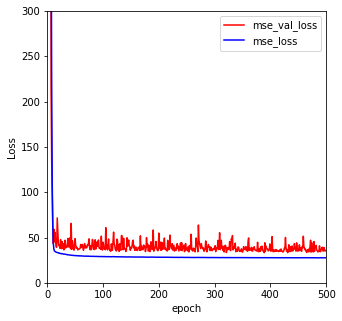

In [ ]:
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(hist.history['val_loss'],color='red')
plt.legend(['mse_val_loss'])
   
plt.plot(hist.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

## 2

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(16, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(1))
    
    
    return model

In [ ]:
model = model1()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                2048      
_________________________________________________________________
batch_normalization_8 (Batch (None, 16)                64        
_________________________________________________________________
activation_8 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 16)                272       
_________________________________________________________________
batch_normalization_9 (Batch (None, 16)                64        
_________________________________________________________________
activation_9 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
hist = model.fit(X_train, dbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, dbp_test))


Epoch 1/500
165/165 [==============================] - 1s 3ms/step - loss: 3702.6448 - val_loss: 3655.1450
Epoch 2/500
165/165 [==============================] - 0s 2ms/step - loss: 3438.6523 - val_loss: 3327.3694
Epoch 3/500
165/165 [==============================] - 2s 10ms/step - loss: 3094.8018 - val_loss: 2739.1909
Epoch 4/500
165/165 [==============================] - 0s 2ms/step - loss: 2622.8936 - val_loss: 2071.4656
Epoch 5/500
165/165 [==============================] - 2s 10ms/step - loss: 2070.2371 - val_loss: 1658.5992
Epoch 6/500
165/165 [==============================] - 0s 2ms/step - loss: 1515.5818 - val_loss: 1125.0745
Epoch 7/500
165/165 [==============================] - 0s 2ms/step - loss: 1025.7052 - val_loss: 651.1761
Epoch 8/500
165/165 [==============================] - 2s 10ms/step - loss: 639.1937 - val_loss: 460.5900
Epoch 9/500
165/165 [==============================] - 0s 2ms/step - loss: 366.8456 - val_loss: 256.0389
Epoch 10/500
165/165 [=================

Epoch 79/500
165/165 [==============================] - 0s 2ms/step - loss: 29.1781 - val_loss: 36.1261
Epoch 80/500
165/165 [==============================] - 2s 10ms/step - loss: 29.2760 - val_loss: 37.2314
Epoch 81/500
165/165 [==============================] - 0s 2ms/step - loss: 29.1702 - val_loss: 38.3919
Epoch 82/500
165/165 [==============================] - 2s 10ms/step - loss: 29.3114 - val_loss: 34.5937
Epoch 83/500
165/165 [==============================] - 0s 2ms/step - loss: 29.1244 - val_loss: 43.8380
Epoch 84/500
165/165 [==============================] - 0s 2ms/step - loss: 29.1696 - val_loss: 51.1572
Epoch 85/500
165/165 [==============================] - 2s 10ms/step - loss: 29.0695 - val_loss: 43.9356
Epoch 86/500
165/165 [==============================] - 0s 2ms/step - loss: 28.9809 - val_loss: 42.3888
Epoch 87/500
165/165 [==============================] - 2s 10ms/step - loss: 29.0247 - val_loss: 40.8266
Epoch 88/500
165/165 [==============================] - 0s 2

Epoch 157/500
165/165 [==============================] - 0s 2ms/step - loss: 28.1153 - val_loss: 42.1323
Epoch 158/500
165/165 [==============================] - 0s 2ms/step - loss: 28.1181 - val_loss: 40.2410
Epoch 159/500
165/165 [==============================] - 2s 10ms/step - loss: 28.0821 - val_loss: 37.1845
Epoch 160/500
165/165 [==============================] - 0s 2ms/step - loss: 28.0237 - val_loss: 39.7116
Epoch 161/500
165/165 [==============================] - 2s 10ms/step - loss: 28.0872 - val_loss: 38.5629
Epoch 162/500
165/165 [==============================] - 0s 2ms/step - loss: 28.1748 - val_loss: 34.9497
Epoch 163/500
165/165 [==============================] - 0s 2ms/step - loss: 28.1311 - val_loss: 33.6233
Epoch 164/500
165/165 [==============================] - 2s 10ms/step - loss: 28.1055 - val_loss: 53.2085
Epoch 165/500
165/165 [==============================] - 0s 2ms/step - loss: 28.0990 - val_loss: 39.7113
Epoch 166/500
165/165 [=============================

165/165 [==============================] - 0s 2ms/step - loss: 27.6207 - val_loss: 34.9258
Epoch 235/500
165/165 [==============================] - 2s 10ms/step - loss: 27.6906 - val_loss: 39.1644
Epoch 236/500
165/165 [==============================] - 0s 2ms/step - loss: 27.6627 - val_loss: 32.9757
Epoch 237/500
165/165 [==============================] - 0s 2ms/step - loss: 27.5788 - val_loss: 37.4581
Epoch 238/500
165/165 [==============================] - 2s 10ms/step - loss: 27.6489 - val_loss: 37.3049
Epoch 239/500
165/165 [==============================] - 0s 2ms/step - loss: 27.6439 - val_loss: 39.2156
Epoch 240/500
165/165 [==============================] - 2s 10ms/step - loss: 27.6446 - val_loss: 33.9185
Epoch 241/500
165/165 [==============================] - 0s 2ms/step - loss: 27.5870 - val_loss: 35.6586
Epoch 242/500
165/165 [==============================] - 0s 2ms/step - loss: 27.7270 - val_loss: 35.3594
Epoch 243/500
165/165 [==============================] - 2s 10ms/s

Epoch 312/500
165/165 [==============================] - 2s 10ms/step - loss: 27.3177 - val_loss: 43.9242
Epoch 313/500
165/165 [==============================] - 0s 2ms/step - loss: 27.4408 - val_loss: 37.7671
Epoch 314/500
165/165 [==============================] - 0s 2ms/step - loss: 27.3771 - val_loss: 38.1179
Epoch 315/500
165/165 [==============================] - 2s 10ms/step - loss: 27.4192 - val_loss: 36.4866
Epoch 316/500
165/165 [==============================] - 0s 2ms/step - loss: 27.3983 - val_loss: 34.0636
Epoch 317/500
165/165 [==============================] - 2s 10ms/step - loss: 27.3433 - val_loss: 41.8522
Epoch 318/500
165/165 [==============================] - 0s 3ms/step - loss: 27.4348 - val_loss: 41.1046
Epoch 319/500
165/165 [==============================] - 0s 2ms/step - loss: 27.3170 - val_loss: 34.6612
Epoch 320/500
165/165 [==============================] - 2s 10ms/step - loss: 27.3222 - val_loss: 37.6465
Epoch 321/500
165/165 [============================

165/165 [==============================] - 2s 10ms/step - loss: 27.2726 - val_loss: 38.1002
Epoch 390/500
165/165 [==============================] - 0s 2ms/step - loss: 27.2598 - val_loss: 39.4904
Epoch 391/500
165/165 [==============================] - 0s 2ms/step - loss: 27.2900 - val_loss: 32.8667
Epoch 392/500
165/165 [==============================] - 2s 10ms/step - loss: 27.2629 - val_loss: 40.8526
Epoch 393/500
165/165 [==============================] - 0s 2ms/step - loss: 27.2051 - val_loss: 33.2176
Epoch 394/500
165/165 [==============================] - 2s 10ms/step - loss: 27.2595 - val_loss: 34.8866
Epoch 395/500
165/165 [==============================] - 0s 2ms/step - loss: 27.2324 - val_loss: 35.9510
Epoch 396/500
165/165 [==============================] - 0s 2ms/step - loss: 27.2593 - val_loss: 34.3773
Epoch 397/500
165/165 [==============================] - 2s 10ms/step - loss: 27.3114 - val_loss: 33.3035
Epoch 398/500
165/165 [==============================] - 0s 2ms/s

Epoch 467/500
165/165 [==============================] - 0s 2ms/step - loss: 27.1201 - val_loss: 34.3364
Epoch 468/500
165/165 [==============================] - 0s 2ms/step - loss: 27.0977 - val_loss: 33.5716
Epoch 469/500
165/165 [==============================] - 2s 10ms/step - loss: 27.1691 - val_loss: 35.0799
Epoch 470/500
165/165 [==============================] - 0s 2ms/step - loss: 27.1720 - val_loss: 37.6170
Epoch 471/500
165/165 [==============================] - 2s 10ms/step - loss: 27.1474 - val_loss: 32.9025
Epoch 472/500
165/165 [==============================] - 0s 2ms/step - loss: 27.1587 - val_loss: 35.7971
Epoch 473/500
165/165 [==============================] - 0s 2ms/step - loss: 27.1394 - val_loss: 35.4122
Epoch 474/500
165/165 [==============================] - 2s 10ms/step - loss: 27.1035 - val_loss: 35.1809
Epoch 475/500
165/165 [==============================] - 0s 2ms/step - loss: 27.1399 - val_loss: 37.7384
Epoch 476/500
165/165 [=============================

In [ ]:
pred = model.predict(X_test)
err = dbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  2.233998726719733 
MAE:  4.802278433061978 
SD:  6.076272956767907


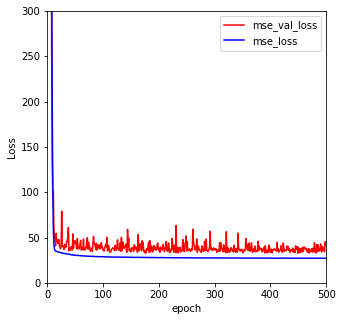

In [ ]:
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(hist.history['val_loss'],color='red')
plt.legend(['mse_val_loss'])
   
plt.plot(hist.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

## 3

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(16, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(1))
    
    
    return model

In [ ]:
model = model1()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 16)                2048      
_________________________________________________________________
batch_normalization_10 (Batc (None, 16)                64        
_________________________________________________________________
activation_10 (Activation)   (None, 16)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 16)                272       
_________________________________________________________________
batch_normalization_11 (Batc (None, 16)                64        
_________________________________________________________________
activation_11 (Activation)   (None, 16)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
hist = model.fit(X_train, dbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, dbp_test))


Epoch 1/500
165/165 [==============================] - 1s 3ms/step - loss: 3528.2554 - val_loss: 3559.2607
Epoch 2/500
165/165 [==============================] - 0s 2ms/step - loss: 3158.3879 - val_loss: 3192.3074
Epoch 3/500
165/165 [==============================] - 2s 10ms/step - loss: 2699.4355 - val_loss: 2512.5085
Epoch 4/500
165/165 [==============================] - 0s 2ms/step - loss: 2154.3000 - val_loss: 1636.7659
Epoch 5/500
165/165 [==============================] - 2s 10ms/step - loss: 1584.6262 - val_loss: 926.4407
Epoch 6/500
165/165 [==============================] - 0s 2ms/step - loss: 1058.0571 - val_loss: 617.7585
Epoch 7/500
165/165 [==============================] - 0s 2ms/step - loss: 627.4865 - val_loss: 396.6554
Epoch 8/500
165/165 [==============================] - 2s 10ms/step - loss: 329.7724 - val_loss: 172.8808
Epoch 9/500
165/165 [==============================] - 0s 3ms/step - loss: 159.6567 - val_loss: 63.9267
Epoch 10/500
165/165 [=====================

165/165 [==============================] - 2s 10ms/step - loss: 30.2918 - val_loss: 36.0590
Epoch 80/500
165/165 [==============================] - 0s 3ms/step - loss: 30.3439 - val_loss: 39.8409
Epoch 81/500
165/165 [==============================] - 2s 10ms/step - loss: 30.1070 - val_loss: 41.1633
Epoch 82/500
165/165 [==============================] - 0s 3ms/step - loss: 30.0570 - val_loss: 37.4398
Epoch 83/500
165/165 [==============================] - 0s 2ms/step - loss: 30.1465 - val_loss: 37.6936
Epoch 84/500
165/165 [==============================] - 2s 10ms/step - loss: 30.1217 - val_loss: 53.2076
Epoch 85/500
165/165 [==============================] - 0s 2ms/step - loss: 30.0278 - val_loss: 37.7968
Epoch 86/500
165/165 [==============================] - 2s 10ms/step - loss: 30.0347 - val_loss: 36.7303
Epoch 87/500
165/165 [==============================] - 0s 2ms/step - loss: 30.1784 - val_loss: 50.6683
Epoch 88/500
165/165 [==============================] - 0s 2ms/step - los

165/165 [==============================] - 0s 2ms/step - loss: 28.9279 - val_loss: 40.6606
Epoch 158/500
165/165 [==============================] - 2s 10ms/step - loss: 28.9734 - val_loss: 36.5082
Epoch 159/500
165/165 [==============================] - 0s 2ms/step - loss: 28.9771 - val_loss: 38.0961
Epoch 160/500
165/165 [==============================] - 2s 10ms/step - loss: 28.9364 - val_loss: 37.8218
Epoch 161/500
165/165 [==============================] - 0s 3ms/step - loss: 28.8333 - val_loss: 40.7516
Epoch 162/500
165/165 [==============================] - 0s 2ms/step - loss: 28.7697 - val_loss: 37.9052
Epoch 163/500
165/165 [==============================] - 2s 10ms/step - loss: 28.7726 - val_loss: 34.1981
Epoch 164/500
165/165 [==============================] - 0s 2ms/step - loss: 28.9235 - val_loss: 36.0081
Epoch 165/500
165/165 [==============================] - 2s 10ms/step - loss: 28.8293 - val_loss: 35.9146
Epoch 166/500
165/165 [==============================] - 0s 2ms/s

Epoch 235/500
165/165 [==============================] - 2s 10ms/step - loss: 28.3199 - val_loss: 38.7103
Epoch 236/500
165/165 [==============================] - 0s 2ms/step - loss: 28.3274 - val_loss: 58.8481
Epoch 237/500
165/165 [==============================] - 2s 10ms/step - loss: 28.2904 - val_loss: 33.4635
Epoch 238/500
165/165 [==============================] - 0s 2ms/step - loss: 28.4118 - val_loss: 42.3554
Epoch 239/500
165/165 [==============================] - 2s 10ms/step - loss: 28.4261 - val_loss: 33.2384
Epoch 240/500
165/165 [==============================] - 0s 3ms/step - loss: 28.3933 - val_loss: 37.3309
Epoch 241/500
165/165 [==============================] - 0s 2ms/step - loss: 28.3175 - val_loss: 35.7420
Epoch 242/500
165/165 [==============================] - 2s 10ms/step - loss: 28.3294 - val_loss: 42.6319
Epoch 243/500
165/165 [==============================] - 0s 3ms/step - loss: 28.3910 - val_loss: 33.3680
Epoch 244/500
165/165 [============================

165/165 [==============================] - 0s 2ms/step - loss: 28.0559 - val_loss: 33.1554
Epoch 313/500
165/165 [==============================] - 0s 2ms/step - loss: 28.0981 - val_loss: 52.2240
Epoch 314/500
165/165 [==============================] - 2s 10ms/step - loss: 28.0557 - val_loss: 43.4275
Epoch 315/500
165/165 [==============================] - 0s 3ms/step - loss: 27.9984 - val_loss: 37.2346
Epoch 316/500
165/165 [==============================] - 2s 10ms/step - loss: 28.0558 - val_loss: 33.1798
Epoch 317/500
165/165 [==============================] - 0s 2ms/step - loss: 27.9887 - val_loss: 33.0371
Epoch 318/500
165/165 [==============================] - 2s 10ms/step - loss: 27.9705 - val_loss: 33.2076
Epoch 319/500
165/165 [==============================] - 0s 3ms/step - loss: 28.0615 - val_loss: 48.7113
Epoch 320/500
165/165 [==============================] - 0s 2ms/step - loss: 28.1244 - val_loss: 34.3688
Epoch 321/500
165/165 [==============================] - 2s 10ms/s

Epoch 390/500
165/165 [==============================] - 2s 10ms/step - loss: 27.8662 - val_loss: 40.1671
Epoch 391/500
165/165 [==============================] - 0s 3ms/step - loss: 27.7705 - val_loss: 38.6658
Epoch 392/500
165/165 [==============================] - 0s 2ms/step - loss: 27.9015 - val_loss: 46.8358
Epoch 393/500
165/165 [==============================] - 2s 10ms/step - loss: 27.8531 - val_loss: 35.7594
Epoch 394/500
165/165 [==============================] - 0s 2ms/step - loss: 27.8492 - val_loss: 35.3840
Epoch 395/500
165/165 [==============================] - 2s 10ms/step - loss: 27.8048 - val_loss: 41.2547
Epoch 396/500
165/165 [==============================] - 0s 3ms/step - loss: 27.8186 - val_loss: 36.4545
Epoch 397/500
165/165 [==============================] - 0s 2ms/step - loss: 27.7869 - val_loss: 36.6314
Epoch 398/500
165/165 [==============================] - 2s 10ms/step - loss: 27.8138 - val_loss: 37.0781
Epoch 399/500
165/165 [============================

165/165 [==============================] - 0s 2ms/step - loss: 27.6699 - val_loss: 42.0197
Epoch 468/500
165/165 [==============================] - 2s 10ms/step - loss: 27.7240 - val_loss: 34.4035
Epoch 469/500
165/165 [==============================] - 0s 2ms/step - loss: 27.5849 - val_loss: 33.3509
Epoch 470/500
165/165 [==============================] - 2s 10ms/step - loss: 27.6171 - val_loss: 37.8121
Epoch 471/500
165/165 [==============================] - 0s 2ms/step - loss: 27.6017 - val_loss: 35.3594
Epoch 472/500
165/165 [==============================] - 0s 2ms/step - loss: 27.6445 - val_loss: 34.5697
Epoch 473/500
165/165 [==============================] - 2s 10ms/step - loss: 27.6294 - val_loss: 33.2500
Epoch 474/500
165/165 [==============================] - 0s 2ms/step - loss: 27.5628 - val_loss: 33.1037
Epoch 475/500
165/165 [==============================] - 2s 10ms/step - loss: 27.6200 - val_loss: 35.8926
Epoch 476/500
165/165 [==============================] - 0s 2ms/s

In [ ]:
pred = model.predict(X_test)
err = dbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  -4.402740282333585 
MAE:  5.852789251455497 
SD:  5.778513258431223


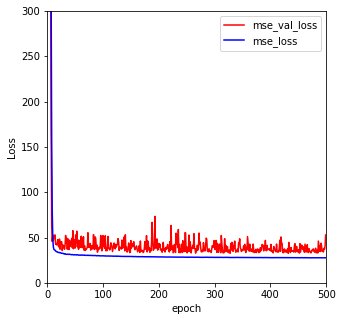

In [ ]:
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(hist.history['val_loss'],color='red')
plt.legend(['mse_val_loss'])
   
plt.plot(hist.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

In [ ]:
Ensemble_me = total_me/3
Ensemble_std = total_std/3

print("\nEnsemble_me: ", Ensemble_me, "\nEnsemble_std: ", Ensemble_std)


Ensemble_me:  -1.2167429674199202 
Ensemble_std:  5.882099547021997
